In [16]:
import pandas as pd

df = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\Electric_Production.csv')
print(df.head())

       DATE  IPG2211A2N
0  1/1/1985     72.5052
1  2/1/1985     70.6720
2  3/1/1985     62.4502
3  4/1/1985     57.4714
4  5/1/1985     55.3151


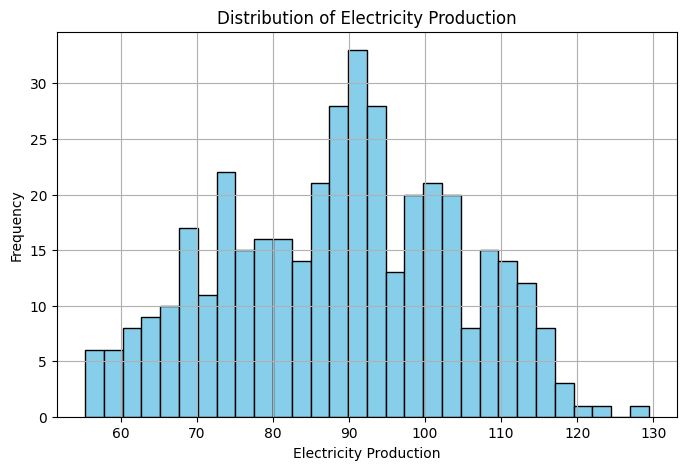

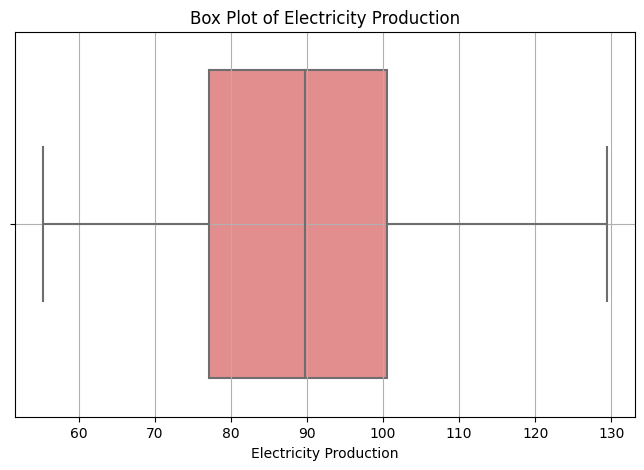

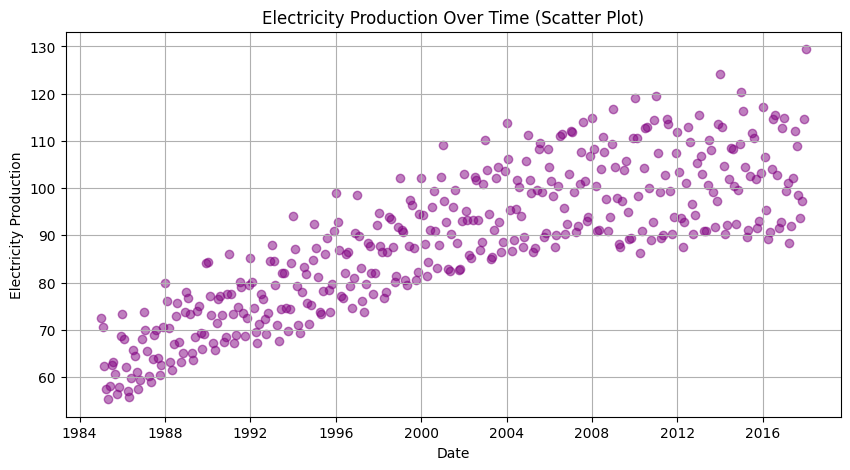

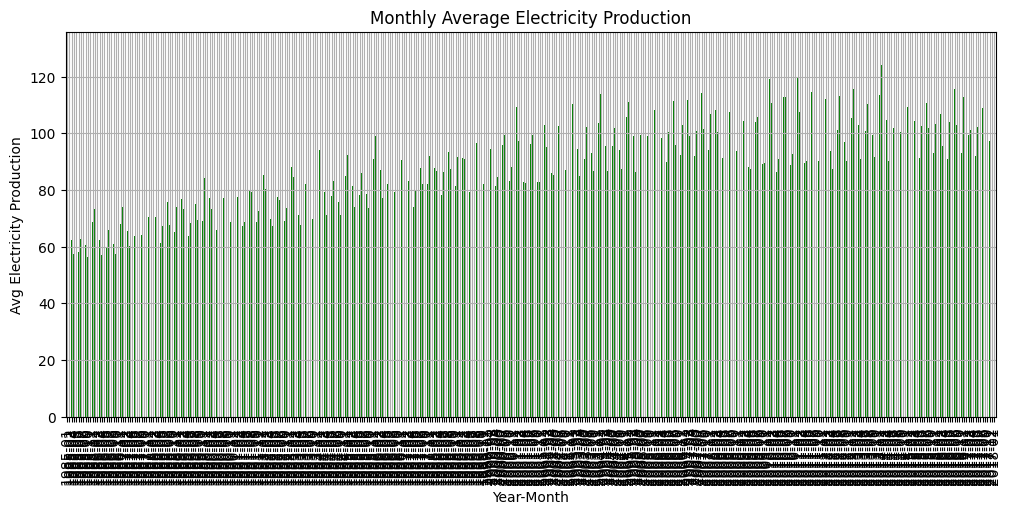

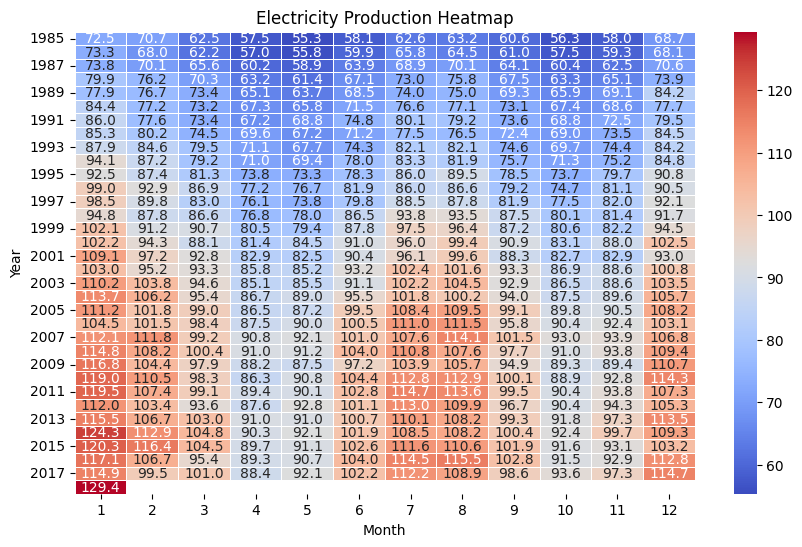

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date column to datetime and set as index
df[df.columns[0]] = pd.to_datetime(df[df.columns[0]], errors='coerce')
df.set_index(df.columns[0], inplace=True)

# Convert numeric columns to appropriate type
df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors='coerce')

# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)

# 1. Histogram of Electricity Production
plt.figure(figsize=(8, 5))
plt.hist(df[df.columns[0]], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Electricity Production')
plt.ylabel('Frequency')
plt.title('Distribution of Electricity Production')
plt.grid(True)
plt.show()

# 2. Box Plot to Detect Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[df.columns[0]], color='lightcoral')
plt.xlabel('Electricity Production')
plt.title('Box Plot of Electricity Production')
plt.grid(True)
plt.show()

# 3. Scatter Plot (Time vs. Electricity Production)
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df[df.columns[0]], color='purple', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Electricity Production')
plt.title('Electricity Production Over Time (Scatter Plot)')
plt.grid(True)
plt.show()

# 4. Bar Chart (Monthly Average Electricity Production)
df['Year-Month'] = df.index.to_period('M')  # Extract Year-Month
monthly_avg = df.groupby('Year-Month')[df.columns[0]].mean()

plt.figure(figsize=(12, 5))
monthly_avg.plot(kind='bar', color='green')
plt.xlabel('Year-Month')
plt.ylabel('Avg Electricity Production')
plt.title('Monthly Average Electricity Production')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# 5. Heatmap (Electricity Production Trends)
df['Year'] = df.index.year
df['Month'] = df.index.month
heatmap_data = df.pivot_table(values=df.columns[0], index='Year', columns='Month')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Electricity Production Heatmap')
plt.show()
